# Task
Tell me about this dataset.

Here is all the data you need:
"train.csv"

## Data loading

### Subtask:
Load the dataset "train.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "train.csv" into a pandas DataFrame and display its first 5 rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('train.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'train.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine the shape, data types, descriptive statistics, missing values, duplicates, and unique values/frequencies for categorical columns of the DataFrame `df`.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Determine the data types of each column
print("\nData Types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Identify and count missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Explore unique values and frequencies for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':\n{df[col].value_counts()}")

Shape of the DataFrame: (891, 12)

Data Types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Descriptive Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.0

## Data visualization

### Subtask:
Visualize the distribution of key variables and relationships between them using histograms, box plots, and scatter plots.


**Reasoning**:
Create histograms, box plots, scatter plots, and bar charts to visualize the distribution of key variables and their relationships, as per the subtask instructions.



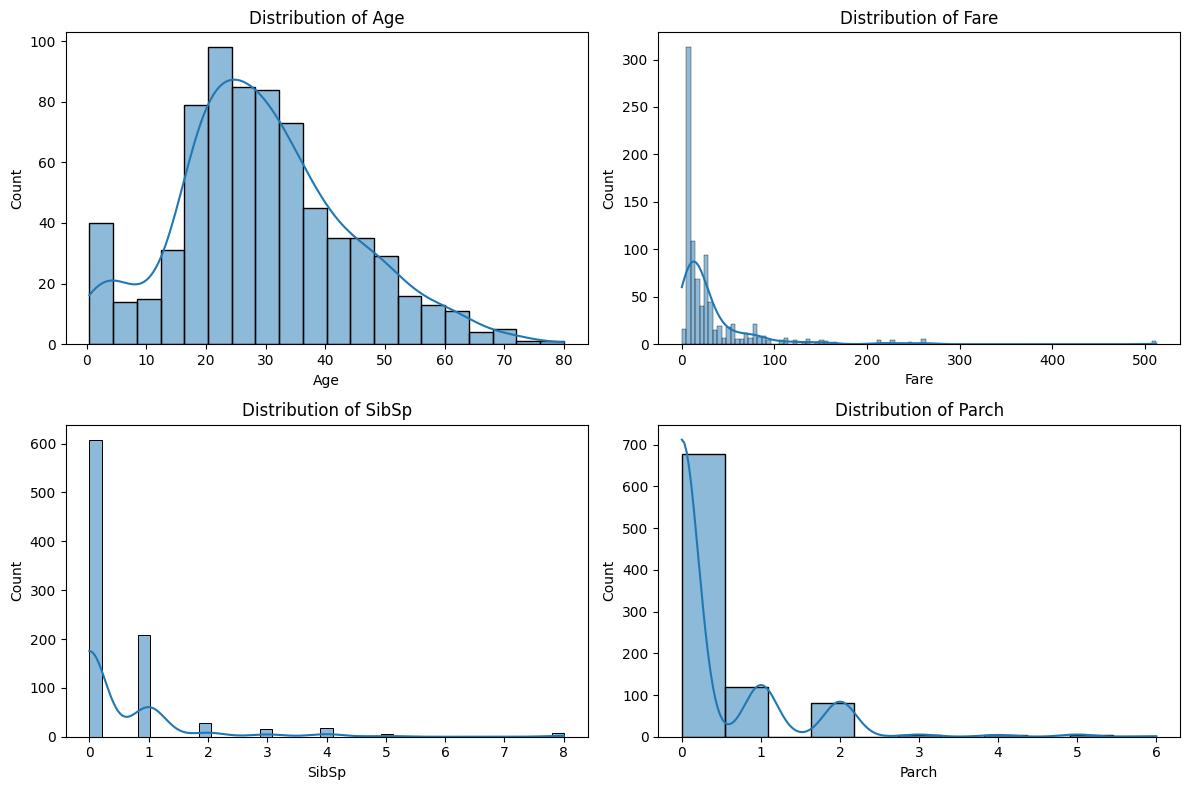

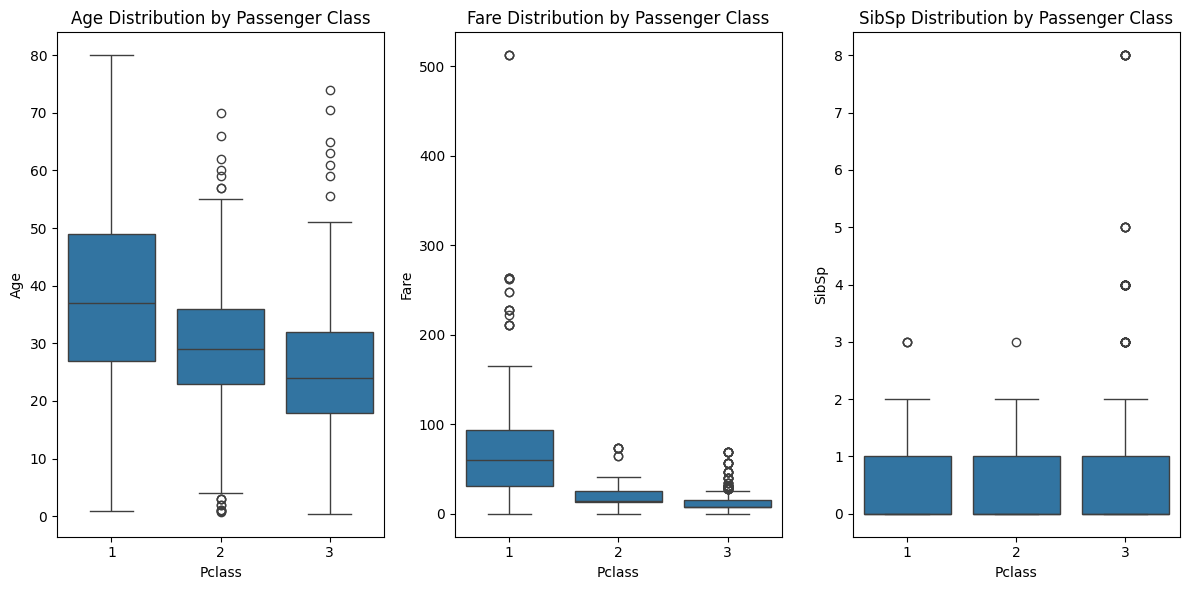

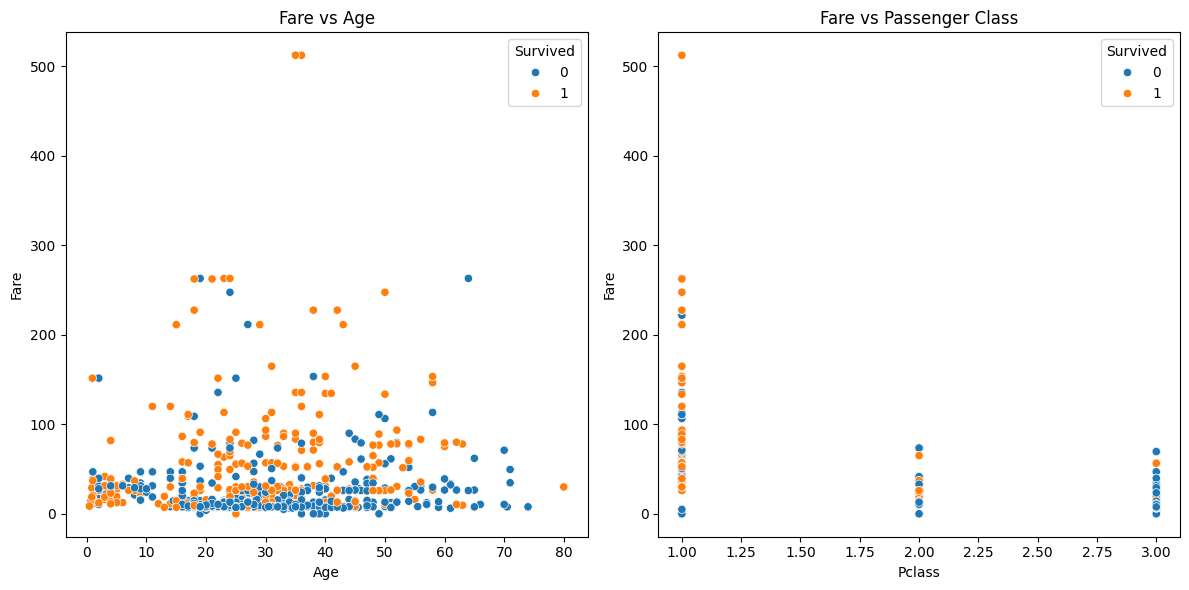

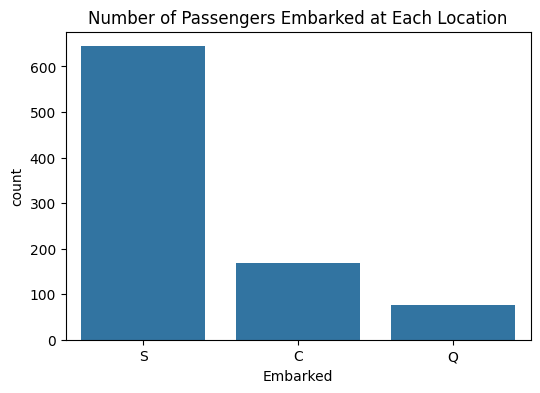

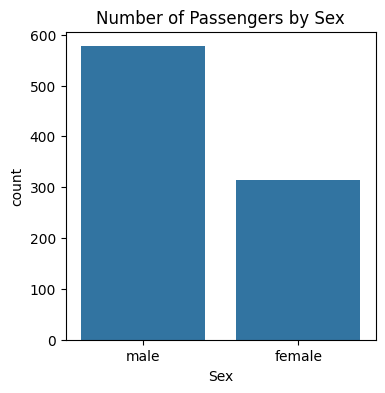

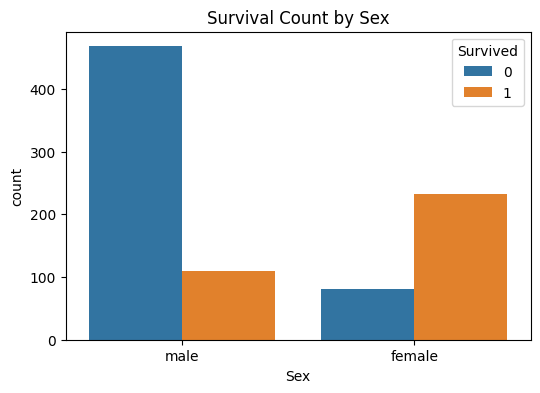

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')

plt.subplot(2, 2, 3)
sns.histplot(df['SibSp'].dropna(), kde=True)
plt.title('Distribution of SibSp')

plt.subplot(2, 2, 4)
sns.histplot(df['Parch'].dropna(), kde=True)
plt.title('Distribution of Parch')
plt.tight_layout()
plt.show()


# Box plots for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')

plt.subplot(1, 3, 2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')

plt.subplot(1, 3, 3)
sns.boxplot(x='Pclass', y='SibSp', data=df)
plt.title('SibSp Distribution by Passenger Class')
plt.tight_layout()
plt.show()


# Scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Passenger Class')
plt.tight_layout()
plt.show()

# Bar chart for 'Embarked'
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title('Number of Passengers Embarked at Each Location')
plt.show()

# Bar chart for 'Sex'
plt.figure(figsize=(4, 4))
sns.countplot(x='Sex', data=df)
plt.title('Number of Passengers by Sex')
plt.show()

# Grouped bar chart for 'Survived' by 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

## Data analysis

### Subtask:
Analyze the data to gain deeper insights.


**Reasoning**:
Calculate the correlation matrix for numerical features, visualize it as a heatmap, and analyze survival rates based on categorical features.



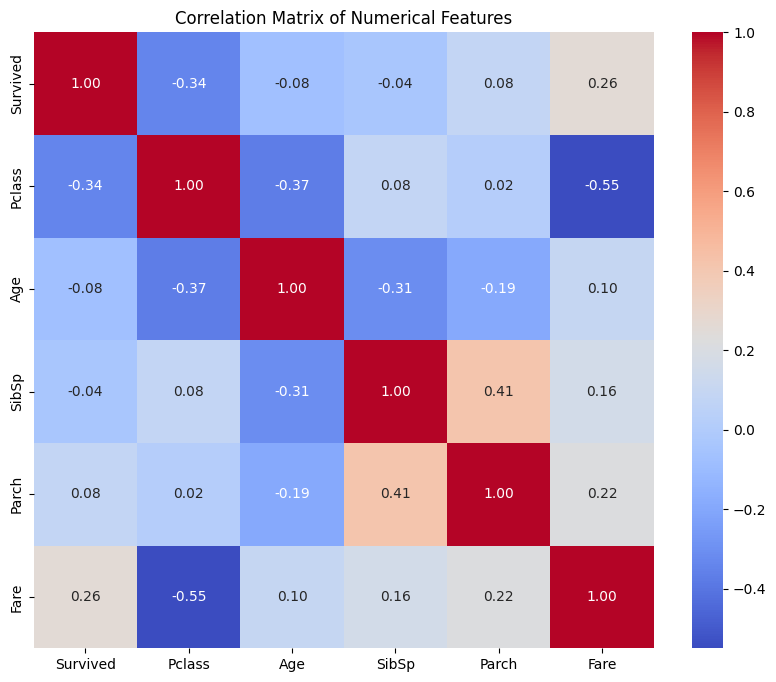


Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze survival rates based on categorical features
categorical_features = ['Sex', 'Pclass', 'Embarked']
for feature in categorical_features:
    print(f"\nSurvival Rate by {feature}:")
    print(df.groupby(feature)['Survived'].mean())

**Reasoning**:
Investigate the relationship between 'Age' and 'Survived' by creating age bands, calculating survival rates within these bands, and visualizing the results.  Then, explore the relationship between 'Fare' and 'Survived', potentially categorizing fares, and visualize this relationship, considering the interaction with 'Pclass'.




Survival Rate by Age Band:
Age_Band
0-18     0.503597
18-30    0.355556
30-50    0.423237
50+      0.343750
Name: Survived, dtype: float64


<ipython-input-5-25f1ab3b8546>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_Band')['Survived'].mean())


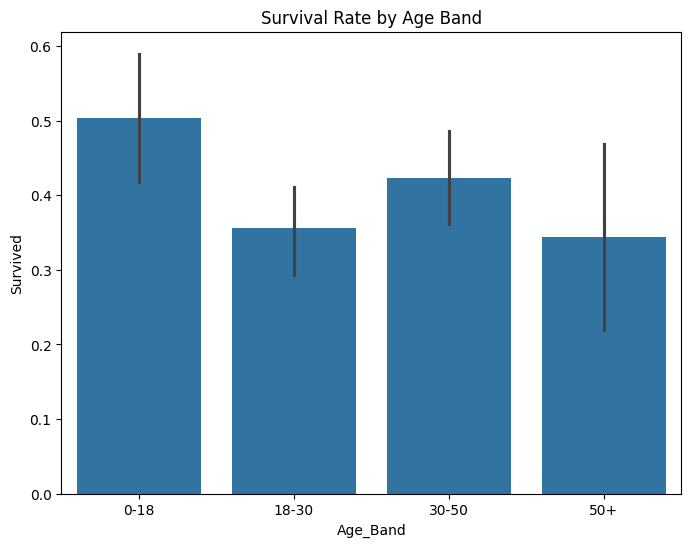


Survival Rate by Fare Band:
Fare_Band
Low          0.197309
Medium       0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64


<ipython-input-5-25f1ab3b8546>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Fare_Band')['Survived'].mean())


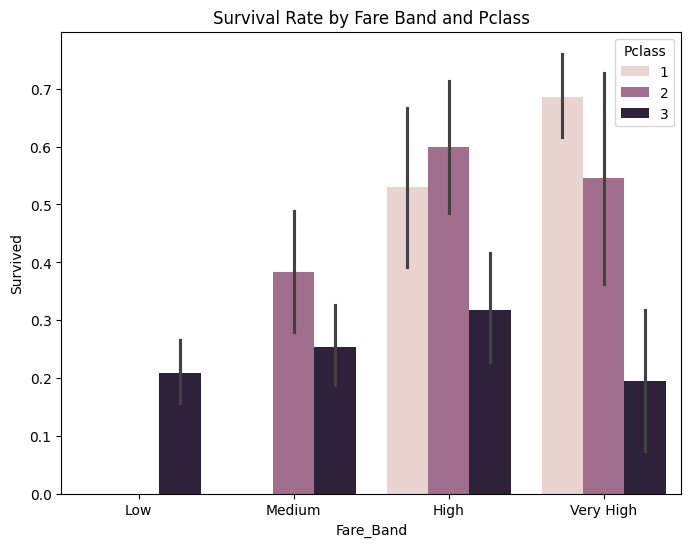

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze 'Age' and 'Survived'
df['Age_Band'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '18-30', '30-50', '50+'])
print("\nSurvival Rate by Age Band:")
print(df.groupby('Age_Band')['Survived'].mean())
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Band', y='Survived', data=df)
plt.title('Survival Rate by Age Band')
plt.show()


# Explore 'Fare' and 'Survived'
df['Fare_Band'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
print("\nSurvival Rate by Fare Band:")
print(df.groupby('Fare_Band')['Survived'].mean())
plt.figure(figsize=(8, 6))
sns.barplot(x='Fare_Band', y='Survived', data=df, hue='Pclass')
plt.title('Survival Rate by Fare Band and Pclass')
plt.show()

**Reasoning**:
Summarize the findings from the analyses.



In [6]:
print("Summary of Findings:")
print("-" * 20)
print("Correlation Analysis:")
print("The heatmap shows the correlation between numerical features.  Pay close attention to the correlations with the 'Survived' column.")
print("\nCategorical Feature Analysis:")
print("Survival rates differ significantly based on Sex, Pclass, and Embarked.")
print("Females had a much higher survival rate than males.")
print("Passengers in higher passenger classes (Pclass 1) had a greater chance of survival compared to those in lower classes.")
print("Embarked location also appears to influence survival rates, with slight differences.")
print("\nAge Analysis:")
print("Survival rates vary across age bands, with children (0-18) showing a higher survival rate compared to other age groups.")
print("\nFare Analysis:")
print("Passengers who paid higher fares ('Fare_Band') tended to have a higher survival rate.  This seems to interact with the passenger class ('Pclass'), with higher class passengers in each fare band having better survival rates.")


Summary of Findings:
--------------------
Correlation Analysis:
The heatmap shows the correlation between numerical features.  Pay close attention to the correlations with the 'Survived' column.

Categorical Feature Analysis:
Survival rates differ significantly based on Sex, Pclass, and Embarked.
Females had a much higher survival rate than males.
Passengers in higher passenger classes (Pclass 1) had a greater chance of survival compared to those in lower classes.
Embarked location also appears to influence survival rates, with slight differences.

Age Analysis:
Survival rates vary across age bands, with children (0-18) showing a higher survival rate compared to other age groups.

Fare Analysis:
Passengers who paid higher fares ('Fare_Band') tended to have a higher survival rate.  This seems to interact with the passenger class ('Pclass'), with higher class passengers in each fare band having better survival rates.


## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly investigates the following:

* How do different features correlate with survival rates on the Titanic?
* What are the key factors influencing survival?
* Are there any significant differences in survival rates based on passenger demographics (sex, age, class) or travel details (fare, embarkation point)?

Based on the analysis, the key factors influencing survival appear to be sex (female passengers had much higher survival rates), passenger class (higher classes had better survival odds), and fare (higher fares correlated with higher survival rates). Age also played a role, with children having higher survival rates.


### 2. Data Analysis Key Findings

* **Missing Data:**  Significant missing values were found in 'Age' (177), 'Cabin' (687), and 'Embarked' (2) columns. The 'Cabin' column has a very high proportion of missing values (687 out of 891).
* **Fare Outliers:** The 'Fare' column shows a large maximum value (512.33) compared to the mean (32.20) and other percentiles, suggesting the presence of outliers.
* **Sex and Survival:** Females had a much higher survival rate than males.
* **Passenger Class and Survival:** Passengers in higher passenger classes (Pclass 1) had a greater chance of survival compared to those in lower classes.
* **Age and Survival:** Survival rates varied across age bands, with children (0-18) showing a higher survival rate compared to other age groups.
* **Fare and Survival:** Passengers who paid higher fares tended to have a higher survival rate, with this relationship seemingly interacting with the passenger class. Higher-class passengers in each fare band had better survival rates.


### 3. Insights or Next Steps

* **Address Missing Data:**  Develop a strategy to handle missing values in the 'Age' and 'Cabin' columns. Imputation or removal might be considered, depending on the downstream modeling goals.
* **Feature Engineering:**  Explore creating new features from existing ones. For example, combining 'SibSp' and 'Parch' into a 'FamilySize' feature, or creating more sophisticated fare bands based on the observed interaction with passenger class.
